

---Customer Purchase Prediction & Effect of Micro-Numerosity



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [23]:
purchase = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv')

In [24]:
purchase.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [25]:

purchase.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [26]:

purchase.describe()

,Customer ID,Age
count,50.00000,50.000000
mean,1045.50000,54.160000
std,14.57738,25.658161
min,1021.00000,15.000000
25%,1033.25000,30.250000
50%,1045.50000,57.000000
75%,1057.75000,74.000000
max,1070.00000,98.000000


In [27]:

purchase.columns

Index(['Customer ID', 'Age', 'Gender', 'Education', 'Review', 'Purchased'], dtype='object')

<Axes: >

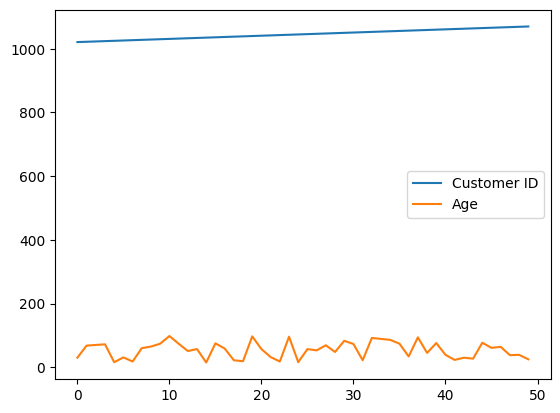

In [28]:
purchase.plot()

In [29]:

y = purchase['Purchased']

In [30]:

X = purchase.drop(['Purchased','Customer ID'],axis=1)

In [31]:
X.replace({'Review':{'Poor':0,'Average':1,'Good':2}},inplace=True)
X.replace({'Education':{'School':0,'UG':1,'PG':2}},inplace=True)
X.replace({'Gender':{'Male': 0,'Female':1}},inplace=True)

In [32]:
X.head()

,Age,Gender,Education,Review
0,30,1,0,1
1,68,1,1,0
2,70,1,2,2
3,72,1,2,2
4,16,1,1,1


In [33]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 4), (10, 4), (40,), (10,))

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [36]:
model.fit(X_train,y_train)


RandomForestClassifier()

In [37]:
y_pred = model.predict(X_test)

In [38]:

y_pred

array(['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No'],
      dtype=object)

In [39]:

confusion_matrix(y_test,y_pred)


array([[4, 1],
       [2, 3]])

In [40]:
accuracy_score(y_test,y_pred)

0.7

In [41]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.67      0.80      0.73         5
         Yes       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



So the prediction result is done over